In [2]:
noisy_imgs_1.shape[0]

50000

In [3]:
model.train(noisy_imgs_1, noisy_imgs_2, 10*int(1+50/10))
out = model.predict(noisy_imgs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [21:56<00:00, 21.94s/it]


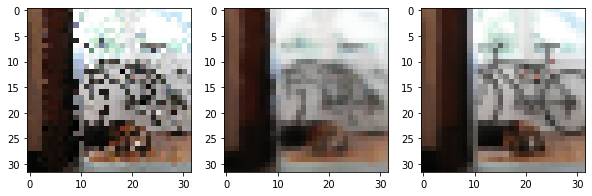

In [4]:
transform = T.ToPILImage()
k = 80
plt.figure(figsize = [10, 5])
plt.subplot(1, 3,1)
plt.imshow(transform(noisy_imgs[k]));
plt.subplot(1, 3,2)
plt.imshow(transform(out[k]/256));
plt.subplot(1, 3,3)
plt.imshow(transform(clean_imgs[k]));

In [5]:
out.shape

torch.Size([1000, 3, 32, 32])

In [6]:
def psnr(denoised, ground_truth):
    mse = torch.mean(torch.mean((denoised-ground_truth)**2,dim=(1,2,3)))
    return -10 * torch.log10(mse + 10**(-8))

psnr(out.cpu().float()/256, clean_imgs.float()/256)

tensor(24.3455)

In [7]:
def compute_psnr(x, y, max_range=1.0):
    assert x.shape == y.shape and x.ndim == 4
    return 20 * torch.log10(torch.tensor(max_range)) - 10 * torch.log10(((x-y)**2).mean((1,2,3))).mean()
compute_psnr(out.cpu().float()/256, clean_imgs.float()/256)

tensor(25.2190)

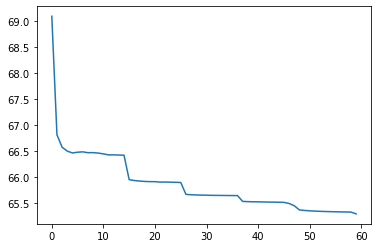

In [8]:
import matplotlib.pyplot as plt
plt.plot(model.loss_train.detach().cpu())

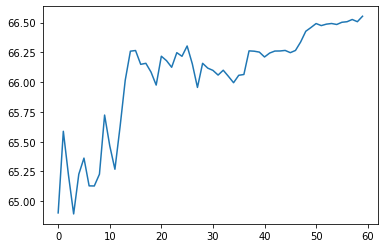

In [9]:
plt.plot(model.loss_valid.detach().cpu())

In [44]:
a = torch.randn(4, 4)
p = torch.argmax(a)
p

tensor(13)

In [45]:
i = torch.floor(p/a.shape[0])
i

tensor(3.)

In [46]:
j = p-i*a.shape[0]
j

tensor(1.)

In [47]:
a[i.long(),j.long()] >a

tensor([[ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True,  True,  True,  True],
        [ True, False,  True,  True]])

In [32]:
import torch
m_all = [[1,3,6,5],[4,8,8,2],[2,4,6,5]]
psnr_t =  torch.tensor(m_all)
p = torch.argmax(psnr_t)
i = torch.floor(p/psnr_t.shape[1]).long()
j = p-i*psnr_t.shape[1]
m_all[i.long().item()][j.long().item()]
# m = m_all[i.long()-1]
# bs = bs_all[j.long()]


psnr:  tensor([[1, 3, 6, 5],
        [4, 8, 8, 2],
        [2, 4, 6, 5]])
tensor(5)
tensor(1)
tensor(1) tensor(1)
8
